In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle
from joblib import dump, load
df = pd.read_csv('data.csv') 
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [65]:
X = df.drop('Order', axis = 'columns')
X.head()

,Year,Major,University,Time
0,Year 2,Physics,Indiana State University,12
1,Year 3,Chemistry,Ball State University,14
2,Year 3,Chemistry,Butler University,12
3,Year 2,Biology,Indiana State University,11
4,Year 3,Business Administration,Butler University,12


In [66]:
y = df.Order
y.shape

(5000,)

In [106]:
oheX = OneHotEncoder(sparse_output=False)
features = oheX.fit_transform(X)
features

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [107]:
oheX.categories_

[array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object),
 array(['Accounting', 'Anthropology', 'Astronomy', 'Biology',
        'Business Administration', 'Chemistry', 'Civil Engineering',
        'Economics', 'Finance', 'Fine Arts', 'International Business',
        'Marketing', 'Mathematics', 'Mechanical Engineering', 'Music',
        'Philosophy', 'Physics', 'Political Science', 'Psychology',
        'Sociology'], dtype=object),
 array(['Ball State University', 'Butler University', 'DePauw University',
        'Indiana State University', 'Indiana University Bloomington',
        'Indiana University-Purdue University Indianapolis (IUPUI)',
        'Purdue University', 'University of Evansville',
        'University of Notre Dame', 'Valparaiso University'], dtype=object),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17], dtype=int64)]

In [108]:
le = LabelEncoder()
response = le.fit_transform(y)
response

array([2, 7, 6, ..., 7, 7, 0])

In [109]:
le.classes_

array(['Breaded Pork Tenderloin Sandwich', 'Cornbread Hush Puppies',
       'Fried Catfish Basket', 'Hoosier BBQ Pulled Pork Sandwich',
       'Indiana Buffalo Chicken Tacos (3 tacos)',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Indiana Pork Chili', 'Sugar Cream Pie', 'Sweet Potato Fries',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'],
      dtype=object)

In [110]:
#10 fold cross validation with K=5 for knn ( the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors =5)
scores = cross_val_score(knn, features, response, cv=10, scoring='accuracy') #cross val score splits data into folds so we don't have to 
scores

array([0.59 , 0.576, 0.658, 0.618, 0.624, 0.626, 0.606, 0.63 , 0.614,
       0.6  ])

In [111]:
#find an optimal value of K for KNN
k_range = range(1,31) # range 1 - 30
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, features, response, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.571, 0.5302, 0.5953999999999999, 0.6085999999999999, 0.6142, 0.616, 0.6144, 0.6160000000000001, 0.6164, 0.612, 0.6152, 0.6129999999999999, 0.6098, 0.612, 0.6132000000000001, 0.6118, 0.6096, 0.6108, 0.6116, 0.613, 0.6072, 0.603, 0.5986, 0.6018000000000001, 0.6035999999999999, 0.601, 0.6043999999999999, 0.5976, 0.6022000000000001, 0.6028]


Text(0, 0.5, 'Cross-validated Accuracy')

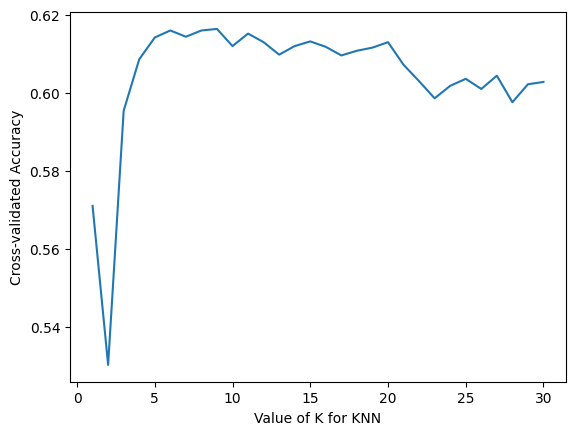

In [112]:
#plot value of K for KNN x-axis versus cros-validated accuracy y-axis
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')

In [82]:
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range) #key n_neighbordsd , value: list 1 - 30
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [85]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(features, response)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [86]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.5710,0.019519,{'n_neighbors': 1}
1,0.5326,0.015285,{'n_neighbors': 2}
2,0.5896,0.024030,{'n_neighbors': 3}
3,0.6098,0.023587,{'n_neighbors': 4}
4,0.6020,0.021909,{'n_neighbors': 5}
5,0.6148,0.020104,{'n_neighbors': 6}
6,0.6146,0.021486,{'n_neighbors': 7}
7,0.6156,0.026485,{'n_neighbors': 8}
8,0.6114,0.026893,{'n_neighbors': 9}
9,0.6100,0.026608,{'n_neighbors': 10}


In [88]:
grid_mean_scores = grid.cv_results_['mean_test_score']
grid_mean_scores

array([0.571 , 0.5326, 0.5896, 0.6098, 0.602 , 0.6148, 0.6146, 0.6156,
       0.6114, 0.61  , 0.6154, 0.6184, 0.615 , 0.6154, 0.6084, 0.6102,
       0.6086, 0.6104, 0.613 , 0.6092, 0.608 , 0.6068, 0.6046, 0.602 ,
       0.6026, 0.604 , 0.6012, 0.5954, 0.5956, 0.5938])

Text(0, 0.5, 'Cross-Validated Accuracy')

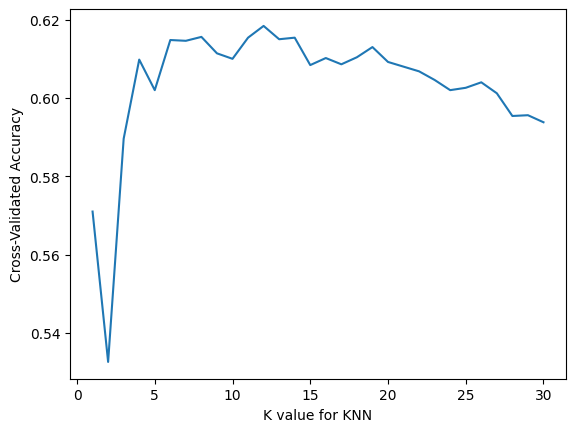

In [89]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('K value for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [90]:
#examine best model
print(grid.best_score_) # single best score achieved across all paramters
print(grid.best_params_) # dictionary with best parameters to generate best score
print(grid.best_estimator_) #actual model object fit with those best parameters which show all of default parameters that weren't speicfied

0.6184000000000001
{'n_neighbors': 12}
KNeighborsClassifier(n_neighbors=12)


In [120]:
X_new = X.sample(4000, random_state=1) #should be out of sample data but we don't have any
oheXNew = OneHotEncoder(sparse_output=False)
features_new = oheXNew.fit_transform(X_new)
features_new

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [121]:
grid.predict(features_new)

array([5, 0, 5, ..., 9, 5, 1])

In [122]:
knn_best = KNeighborsClassifier(n_neighbors = 12)
knn_best.fit(features, response)
knn_best.predict(features_new)

array([5, 0, 5, ..., 9, 5, 1])

In [127]:
s = pickle.dumps(knn_best)

In [128]:
dump(knn_best, 'knn_best_file.joblib')

['knn_best_file.joblib']